In [165]:
from matplotlib.patches import Rectangle
from tempfile import NamedTemporaryFile
from matplotlib.lines import Line2D
from matplotlib.image import imread
import matplotlib.pyplot as plt
import seaborn as sns


def get_size(fig, dpi=100):
    with NamedTemporaryFile(suffix='.png') as f:
        fig.savefig(f.name, bbox_inches='tight', dpi=dpi)
        height, width, _channels = imread(f.name).shape
        return width / dpi, height / dpi


def set_size(fig, size, dpi=100, eps=1e-2, give_up=2, min_size_px=10):
    target_width, target_height = size
    set_width, set_height = target_width, target_height  # reasonable starting point
    deltas = []  # how far we have
    while True:
        fig.set_size_inches([set_width, set_height])
        actual_width, actual_height = get_size(fig, dpi=dpi)
        set_width *= target_width / actual_width
        set_height *= target_height / actual_height
        deltas.append(abs(actual_width - target_width) + abs(actual_height - target_height))
        if deltas[-1] < eps:
            return True
        if len(deltas) > give_up and sorted(deltas[-give_up:]) == deltas[-give_up:]:
            return False
        if set_width * dpi < min_size_px or set_height * dpi < min_size_px:
            return False

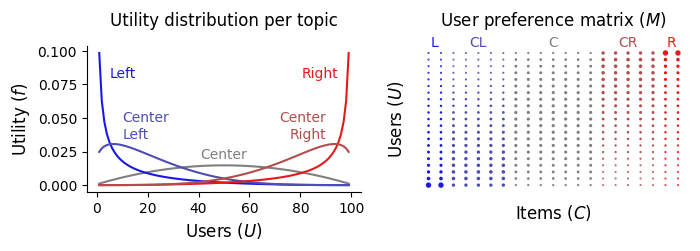

In [254]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(1, 100, 1)


fig, axs = plt.subplots(1, 2, figsize=(5,2.5), gridspec_kw={"hspace": 0.05})
rvC = stats.betabinom(100, 2, 2)
axs[0].plot(x, rvC.pmf(x), color="#808080")
rvL = stats.betabinom(100, .3, 3)
axs[0].plot(x, rvL.pmf(x), color="#1919e6")
rvCL = stats.betabinom(100, 1.3, 5)
axs[0].plot(x, rvCL.pmf(x), color="#4d4db3")
rvR = stats.betabinom(100, 3, .3)
axs[0].plot(x, rvR.pmf(x), color="#e61919")
rvCR = stats.betabinom(100, 5, 1.3)
axs[0].plot(x, rvCR.pmf(x), color="#b34d4d")
axs[0].spines['right'].set_visible(False)
axs[0].spines['top'].set_visible(False)
axs[0].set_xlabel("Users ($U$)", fontsize=12)
axs[0].set_ylabel("Utility ($f$)", fontsize=12)
axs[0].set_title("Utility distribution per topic", pad=15, fontsize=12)
axs[0].text( 5, 0.08, "Left", ha="left", color="#1919e6")
axs[0].text( 100 - 5, 0.08, "Right", ha="right", color="#e61919")
axs[0].text( 10, 0.035, "Center\nLeft", ha="left", color="#4d4db3")
axs[0].text( 100 - 10, 0.035, "Center\nRight", ha="right", color="#b34d4d")
axs[0].text( 50, 0.02, "Center", ha="center", color="#808080")
idx = 0
for size, color, rv in zip(
    [2, 5, 7, 5, 2],
    ["#1919e6", "#4d4db3", "#808080", "#b34d4d", "#e61919"],
    [rvL, rvCL, rvC, rvCR, rvR]
):
    
    for i in range(size):
        x = np.arange(0, 101, 5)

        axs[1].scatter([i + idx] * len(x), x, color=color, s=np.sqrt(rv.pmf(x)*200 + 0.04), marker="o")
    idx += size
    
# axs[1].set_xlim([-1.5, 100])
axs[1].spines['right'].set_visible(False)
axs[1].spines['top'].set_visible(False)
axs[1].spines['left'].set_visible(False)
axs[1].spines['bottom'].set_visible(False)
axs[1].set_xlabel("Items ($C$)", fontsize=12)
axs[1].set_ylabel("Users ($U$)", fontsize=12)
axs[1].set_xticks([])
axs[1].set_yticks([])
axs[1].set_title("User preference matrix ($M$)", pad=15, fontsize=12)
axs[1].text( 0.5, 105, "L", ha="center", color="#1919e6")
axs[1].text( 2 + 5/2 - .5, 105, "CL", ha="center", color="#4d4db3")
axs[1].text( 2 + 5 + 7/2  - .5, 105, "C", ha="center", color="#808080")
axs[1].text( 2 +5 + 7 + 5/2 - .5, 105, "CR", ha="center", color="#b34d4d")
axs[1].text( 2 +5 + 7 + 5 + 2/2 - .5, 105, "R", ha="center", color="#e61919")
set_size(fig, (7, 2.5))
fig.savefig("example.pdf", bbox_inches="tight")
